In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
from run_process import _get_lambdas
from plot import metric_to_lambda, metric_to_title, datasets, algos

In [61]:
resultdf = pd.read_csv('results/' + 'adult_old' + "_" + 'lr' + "__evalthresholds.csv")


In [62]:
resultdf

,thresholds,tpr_A,tpr_B,selection_A,selection_B,fpr_A,fpr_B,trial,lambda,acc_A,acc_B,acc_overall
0,0.00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0,orig,0.300575,0.105975,0.236963
1,0.01,1.000000,1.000000,0.998358,0.957535,0.997652,0.952501,0,orig,0.302217,0.148440,0.251950
2,0.02,0.999696,0.994681,0.983849,0.876738,0.977038,0.862757,0,orig,0.316543,0.228110,0.287636
3,0.03,0.999089,0.991135,0.967333,0.790304,0.953686,0.766499,0,orig,0.332695,0.313792,0.326516
4,0.04,0.998786,0.964539,0.953007,0.693912,0.933333,0.661833,0,orig,0.346838,0.404547,0.365702
...,...,...,...,...,...,...,...,...,...,...,...,...
6055,0.96,0.015897,0.017268,0.004790,0.002027,0.000000,0.000000,9,eo_2,0.703455,0.884630,0.763835
6056,0.97,0.013757,0.017268,0.004146,0.002027,0.000000,0.000000,9,eo_2,0.702810,0.884630,0.763405
6057,0.98,0.011312,0.015699,0.003409,0.001843,0.000000,0.000000,9,eo_2,0.702073,0.884445,0.762852
6058,0.99,0.009783,0.015699,0.002948,0.001843,0.000000,0.000000,9,eo_2,0.701612,0.884445,0.762545


In [12]:
def plot_summary(dataset, alg):
    plt.figure(figsize=(30, 10))
    filename_base = 'plots/' + dataset + '/' + alg + '_'
    # compile the 8 plot: uncorrected (PR, TPR, FPR, EO) // corrected ()
    plt.subplot(2,4,1)
    data = plt.imread(filename_base + 'selection_lmbd=orig.png')
    plt.axis('off')
    plt.imshow(data)

    plt.subplot(2,4,2)
    data = plt.imread(filename_base + 'tpr_lmbd=orig.png')
    plt.axis('off')
    plt.imshow(data)

    plt.subplot(2,4,3)
    data = plt.imread(filename_base + 'fpr_lmbd=orig.png')
    plt.axis('off')
    plt.imshow(data)

    plt.subplot(2,4,4)
    data = plt.imread(filename_base + 'eqodds_lmbd=orig.png')
    plt.axis('off')
    plt.imshow(data)

    plt.subplot(2,4,5)
    data = plt.imread(filename_base + 'selection_lmbd=full.png')
    plt.axis('off')
    plt.imshow(data)

    plt.subplot(2,4,6)
    data = plt.imread(filename_base + 'tpr_lmbd=tpr.png')
    plt.axis('off')
    plt.imshow(data)

    plt.subplot(2,4,7)
    data = plt.imread(filename_base + 'fpr_lmbd=fpr.png')
    plt.axis('off')
    plt.imshow(data)

    plt.subplot(2,4,8)
    data = plt.imread(filename_base + 'eqodds_lmbd=eo_1.png')
    plt.axis('off')
    plt.imshow(data)


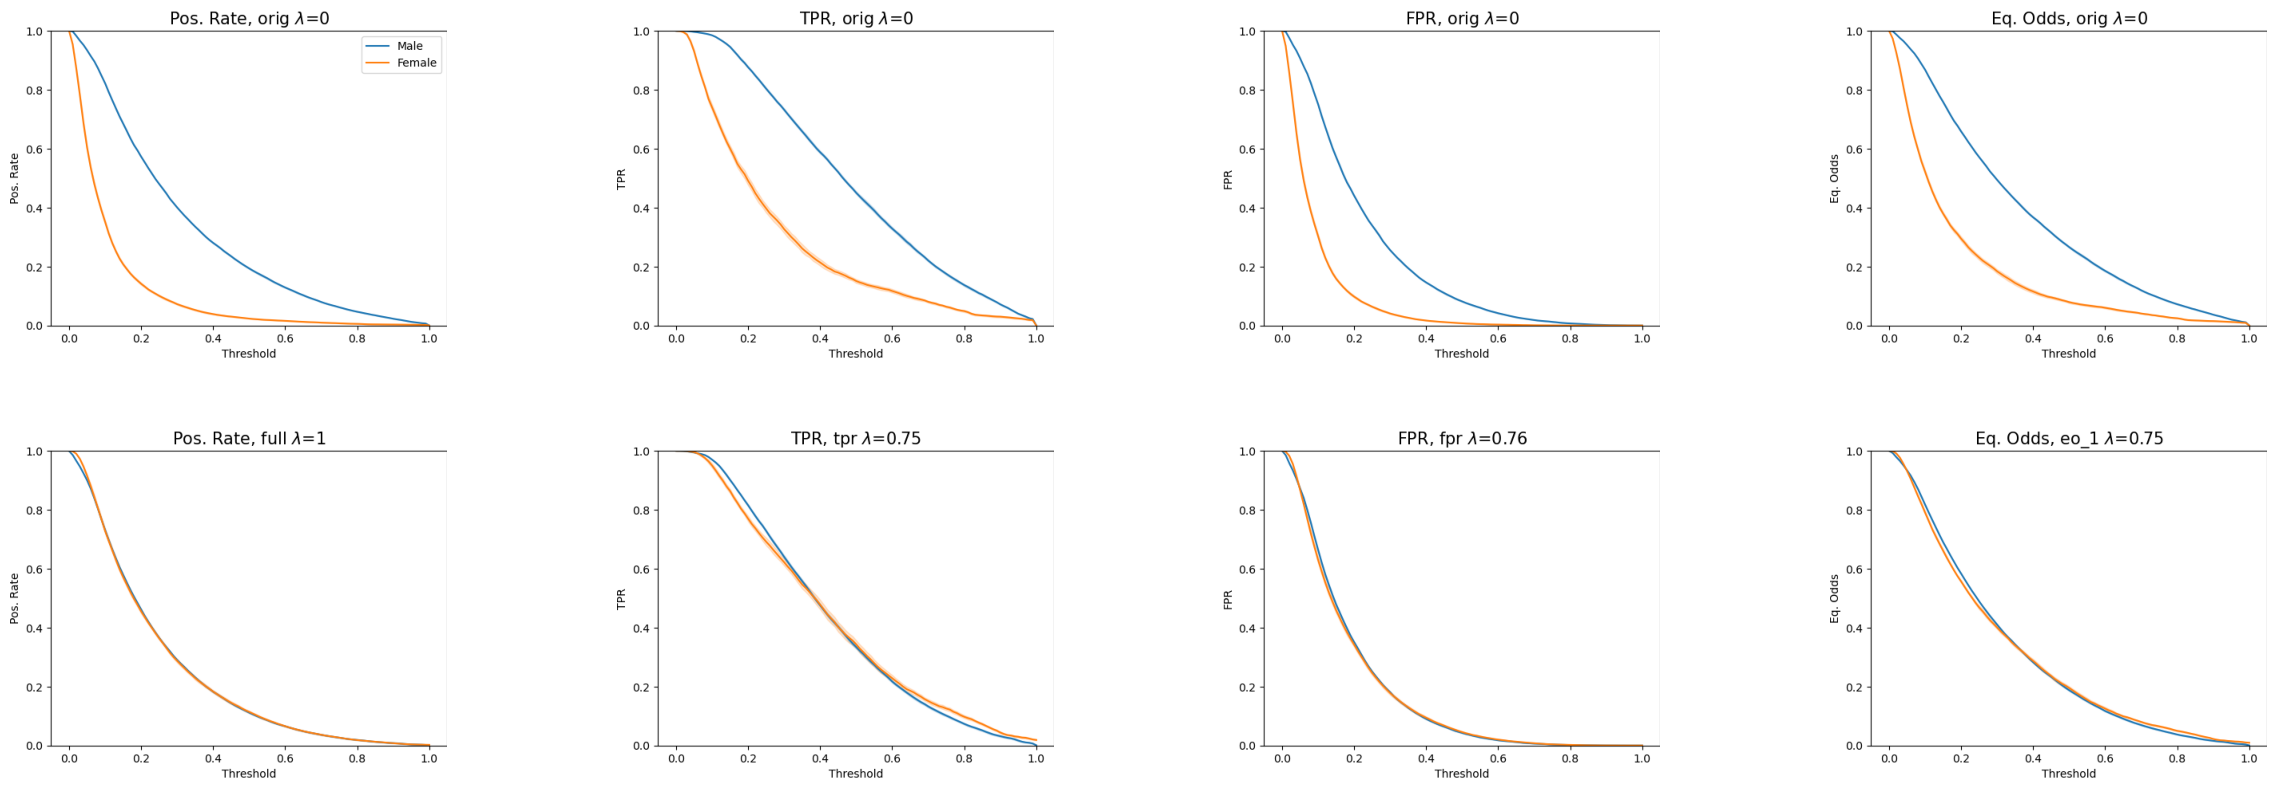

In [60]:
plot_summary('adult_old', 'lr')

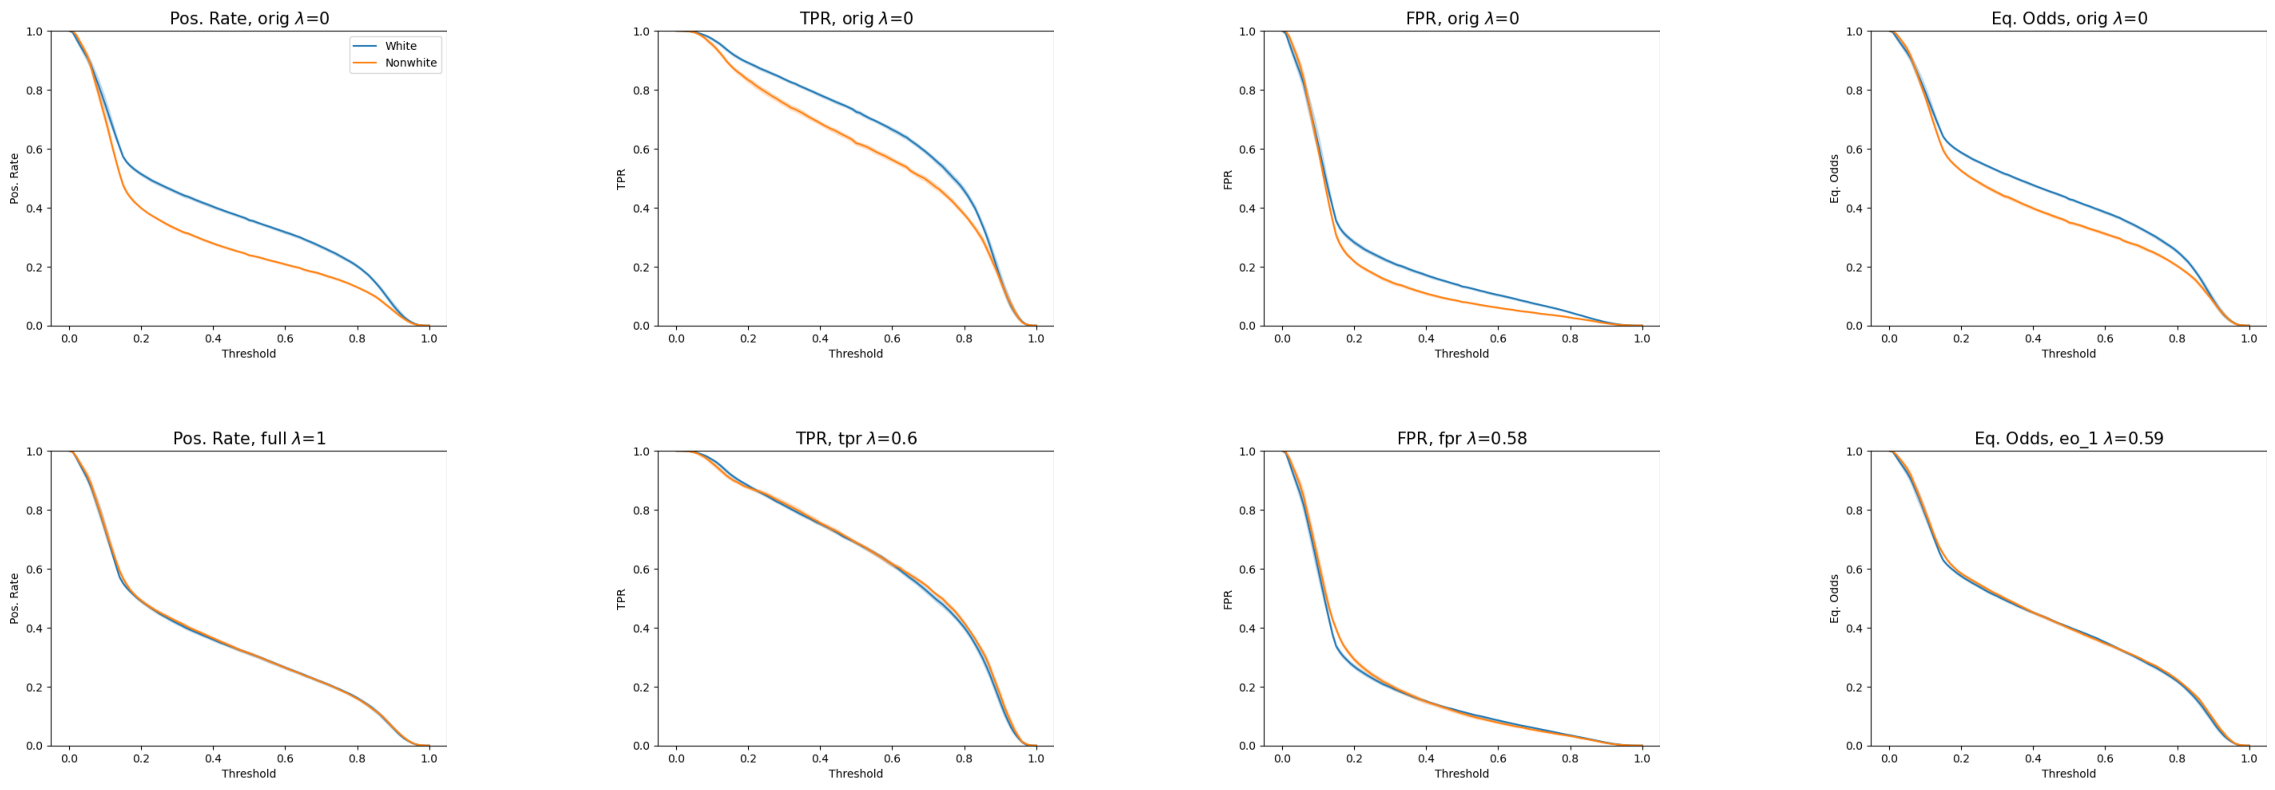

In [56]:
plot_summary('adult_new', 'svm')

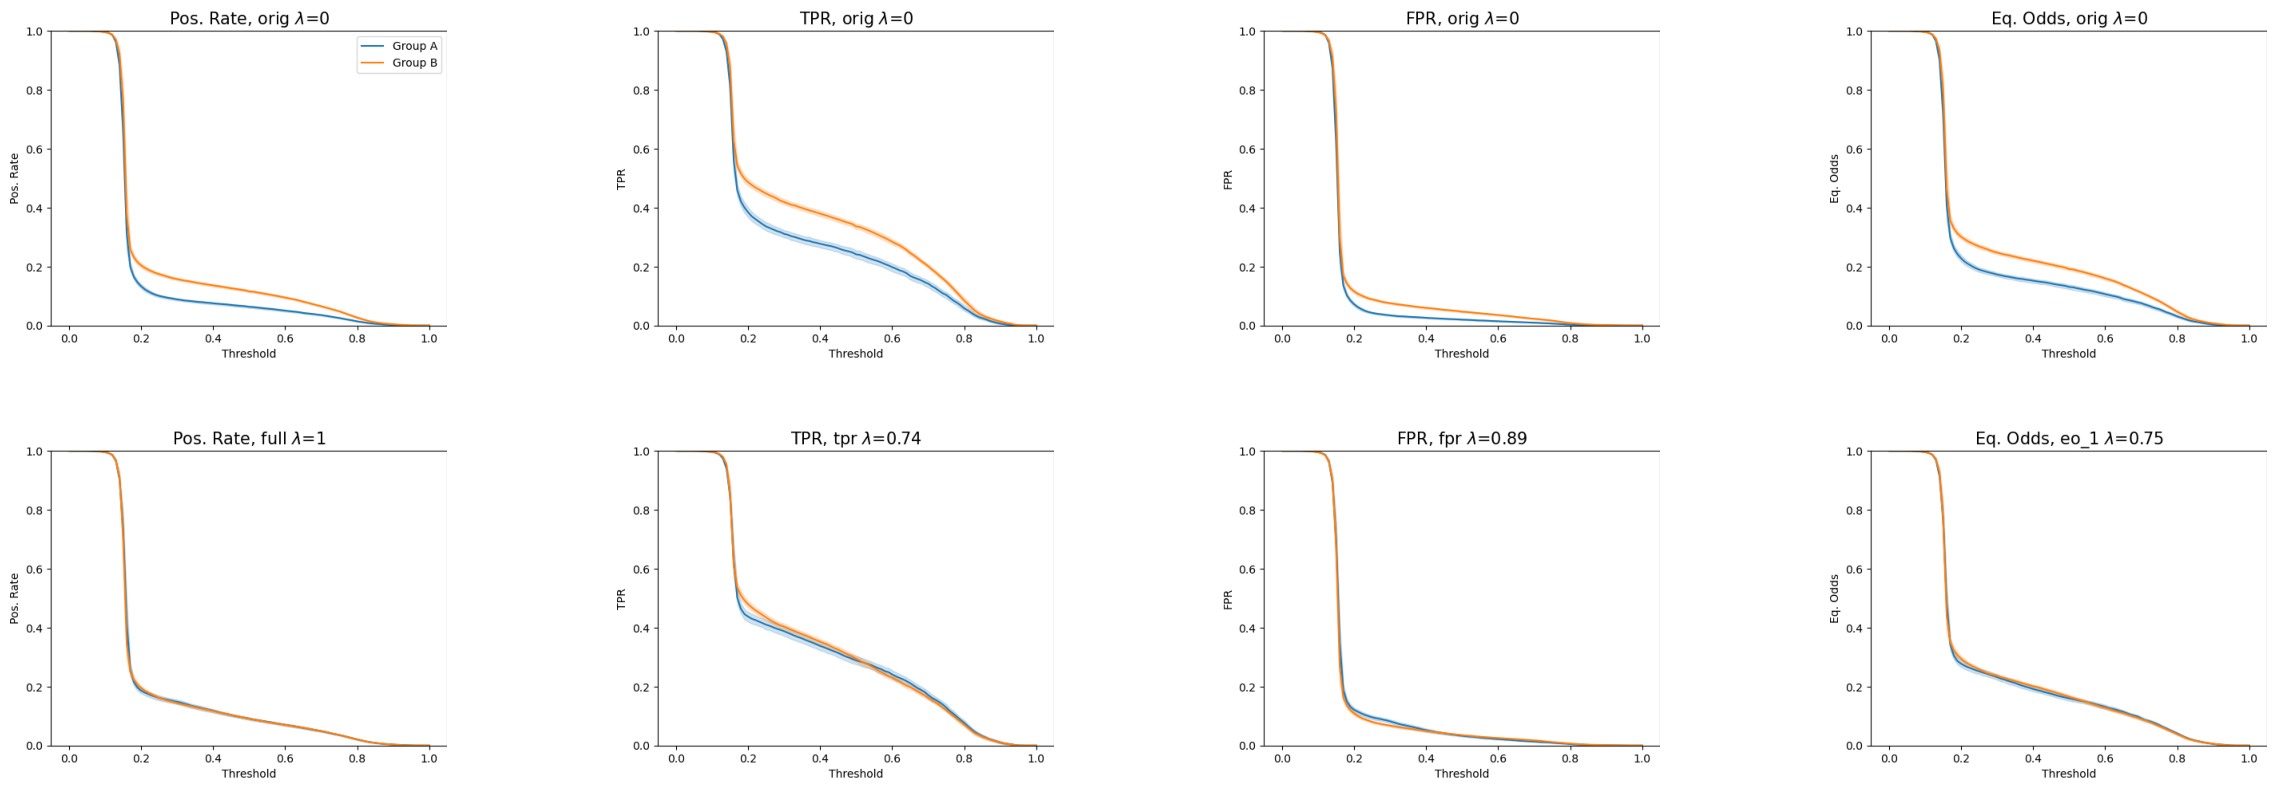

In [59]:
plot_summary('taiwan', 'svm')

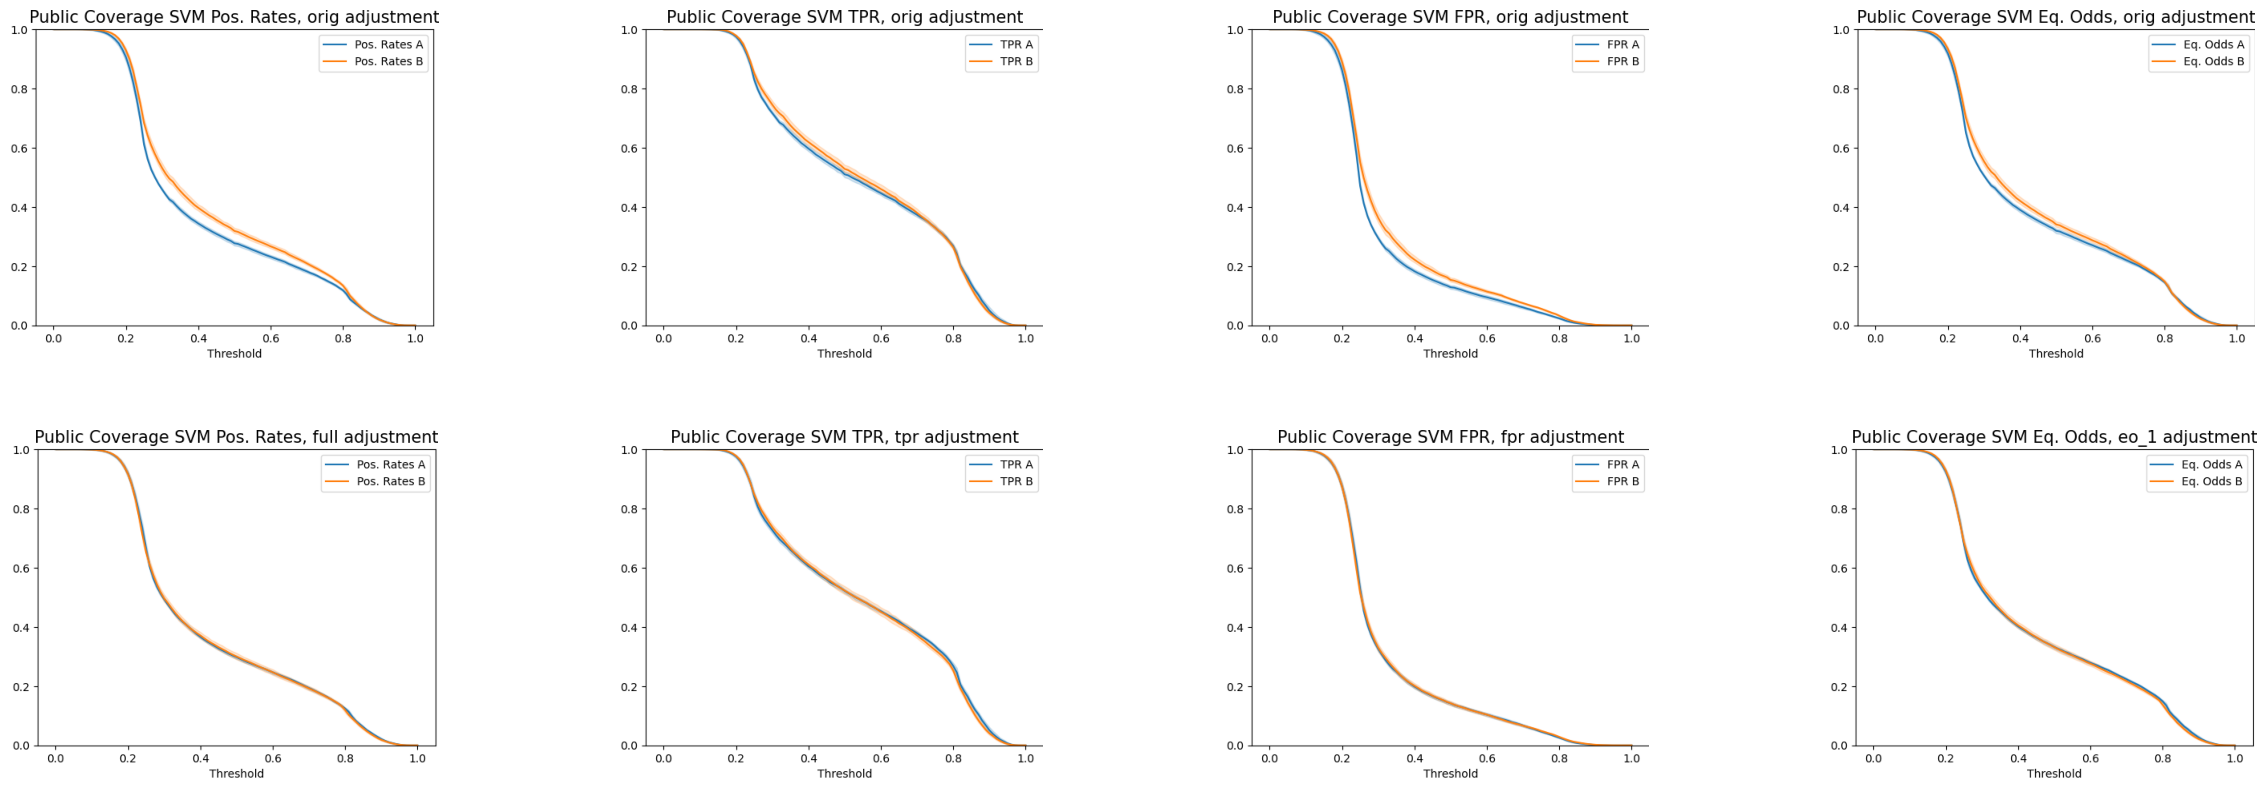

In [42]:
plot_summary('public', 'svm')

# old

In [3]:
data_source = ACSDataSource(survey_year='2018', horizon='1-Year', survey='person')
acs_data = data_source.get_data(states=['CA'], download=False) #, download=True)

In [4]:
acs_data.to_csv('data_raw/acs_data.csv', index=False)

In [30]:
filtered = public_coverage_filter(acs_data)[ACSPublicCoverage.features]

In [37]:
filtered_goodcols = filtered[ACSPublicCoverage.features].apply(lambda x: np.nan_to_num(x, -1))

In [38]:
len(filtered_goodcols)

138554

In [39]:
filtered_goodcols.head()

,AGEP,SCHL,MAR,SEX,DIS,ESP,CIT,MIG,MIL,ANC,NATIVITY,DEAR,DEYE,DREM,PINCP,ESR,ST,FER,RAC1P
1,18,14.0,5,2,2,0.0,1,1.0,4.0,1,1,2,2,2.0,0.0,6.0,6,2.0,1
3,25,1.0,5,1,1,0.0,1,1.0,4.0,1,1,1,2,1.0,0.0,6.0,6,0.0,1
4,31,18.0,5,2,2,0.0,1,1.0,4.0,1,1,2,2,2.0,0.0,6.0,6,2.0,1
5,19,18.0,5,1,2,0.0,5,2.0,4.0,1,2,2,2,2.0,50.0,6.0,6,0.0,6
6,21,16.0,5,1,2,0.0,1,1.0,4.0,2,1,2,2,2.0,7700.0,1.0,6,0.0,1


In [19]:
ACSIncome.df_to_numpy(acs_data)[0][:10, :4]

array([[30.,  6., 14.,  1.],
       [21.,  4., 16.,  5.],
       [65.,  2., 22.,  5.],
       [33.,  1., 14.,  3.],
       [18.,  2., 19.,  5.],
       [17.,  1., 15.,  5.],
       [27.,  5., 21.,  5.],
       [19.,  1., 18.,  5.],
       [27.,  1., 19.,  5.],
       [19.,  5., 16.,  5.]])

In [9]:
ACSIncome.group

'RAC1P'

In [10]:
ACSIncome.target

'PINCP'

In [7]:
acs_data.head()

,RT,SERIALNO,DIVISION,SPORDER,PUMA,REGION,ST,ADJINC,PWGTP,AGEP,...,PWGTP71,PWGTP72,PWGTP73,PWGTP74,PWGTP75,PWGTP76,PWGTP77,PWGTP78,PWGTP79,PWGTP80
0,P,2018GQ0000004,9,1,3701,4,6,1013097,32,30,...,34,60,60,7,8,59,33,8,58,32
1,P,2018GQ0000013,9,1,7306,4,6,1013097,45,18,...,0,0,0,91,46,46,0,89,45,0
2,P,2018GQ0000016,9,1,3755,4,6,1013097,109,69,...,105,232,226,110,114,217,2,111,2,106
3,P,2018GQ0000020,9,1,7319,4,6,1013097,34,25,...,67,0,34,34,69,0,34,35,0,0
4,P,2018GQ0000027,9,1,6511,4,6,1013097,46,31,...,47,81,10,11,79,47,44,81,47,10


In [26]:
ad = AdultDataset(protected_attribute_names=['sex'], categorical_features=[] ,privileged_classes=[['Male']],     features_to_keep=['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']) #, 'workclass']))

In [38]:
split1 = ad.split(1, shuffle=True, seed=0)

In [48]:
split1[0].features.shape

(48842, 6)

In [52]:
len(ad.labels)

48842

In [49]:
split1[0].feature_names

['age',
 'education-num',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [44]:
split1[0].convert_to_dataframe()[0].head()

,age,education-num,sex,capital-gain,capital-loss,hours-per-week,income-per-year
38113,36.0,13.0,1.0,0.0,0.0,40.0,0.0
39214,57.0,15.0,1.0,0.0,0.0,36.0,1.0
44248,49.0,14.0,1.0,4787.0,0.0,45.0,1.0
10283,54.0,3.0,1.0,0.0,0.0,55.0,0.0
26724,17.0,6.0,0.0,0.0,0.0,24.0,0.0


In [45]:
split2 = ad.split(1, shuffle=True, seed=2)
split2[0].convert_to_dataframe()[0].head()

,age,education-num,sex,capital-gain,capital-loss,hours-per-week,income-per-year
41945,47.0,10.0,1.0,0.0,0.0,50.0,0.0
3260,31.0,9.0,1.0,0.0,0.0,50.0,0.0
20109,37.0,10.0,1.0,0.0,0.0,40.0,0.0
19725,59.0,14.0,1.0,0.0,0.0,50.0,0.0
45867,35.0,9.0,0.0,0.0,0.0,40.0,0.0


In [27]:
addf = ad.convert_to_dataframe()[0]

In [29]:
addf.head()

,age,education-num,sex,capital-gain,capital-loss,hours-per-week,income-per-year
0,25.0,7.0,1.0,0.0,0.0,40.0,0.0
1,38.0,9.0,1.0,0.0,0.0,50.0,0.0
2,28.0,12.0,1.0,0.0,0.0,40.0,1.0
3,44.0,10.0,1.0,7688.0,0.0,40.0,1.0
4,18.0,10.0,0.0,0.0,0.0,30.0,0.0


In [32]:
shuffledaddf = addf.sample(frac=1)

In [37]:
# old shuffle code 
seed = 0
np.random.seed(seed)
shuffleinds = np.arange(len(addf))
np.random.shuffle(shuffleinds)

    # X = X[shuffleinds]
    # labels = labels[shuffleinds]
    # sensv = sensv[shuffleinds]

In [16]:
shuffled_ad = ad.copy()
shuffled_ad.features = ad.features[shuffleinds]
shuffled_ad.labels = ad.labels[shuffleinds]


45222

In [17]:
ad.features.shape

(45222, 97)

In [2]:
np.random.seed(1)

In [3]:
fico_df = pd.read_csv('data/fico_probs.csv').sample(frac=1)


In [4]:
bins = np.arange(0, 100.5, .5)

In [5]:
repaired_jess, bc = geometric_adjustment(train_df=fico_df[:3000],
                                        test_df=fico_df[:6000],
                                        sens_col="group",
                                        score_col="score",
                                        solver="bregman",
                                        bins=bins,
                                        return_barycenter=True)


/mnt/c/Users/jeska/work/distributional-fairness/sens_nb/bcmap.py:199: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  samples = np.array([g[score_col].to_numpy() for g in groups]) #get the scores for each group
/home/jessica/miniconda3/lib/python3.8/site-packages/ot/bregman.py:1533: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


In [6]:
repaired_jess.head()

,group,score,label,repaired_score,adjust
26247,white,43.5,1,43.5,0.0
35067,white,66.0,1,66.0,0.0
34590,white,65.0,1,65.0,0.0
16668,white,16.5,0,17.5,1.0
12196,white,1.5,0,2.5,1.0


In [7]:
adjusted_train = repaired_jess[3000:]

In [8]:
data_pos_label = adjusted_train[adjusted_train["label"] == 1].copy()

In [9]:
data_pos_label = data_pos_label.copy().sort_values(by='group')

In [12]:
lambdas, group_map, losses = lexicographicOptimizer(
    df=data_pos_label,
    attr_col="group",
    score_col="score",
    shift_col="adjust"
)

/home/jessica/.local/lib/python3.8/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


`xtol` termination condition is satisfied.
Number of iterations: 219, function evaluations: 1805, CG iterations: 368, optimality: 2.40e+00, constraint violation: 0.00e+00, execution time: 0.47 s.
`xtol` termination condition is satisfied.
Number of iterations: 320, function evaluations: 1600, CG iterations: 338, optimality: 2.41e+00, constraint violation: 1.68e-02, execution time:  1.1 s.
`xtol` termination condition is satisfied.
Number of iterations: 211, function evaluations: 1055, CG iterations: 211, optimality: 3.30e-01, constraint violation: 4.36e+00, execution time:  2.0 s.
`xtol` termination condition is satisfied.
Number of iterations: 327, function evaluations: 1635, CG iterations: 349, optimality: 1.20e-02, constraint violation: 6.50e-01, execution time:  7.5 s.


In [13]:
np.array(lambdas)

array([[ 0.00151493,  0.53806225,  0.69866138,  0.30959396],
       [-0.01681198,  0.54634197,  0.7111479 ,  0.19106198],
       [ 0.7726235 ,  0.54732777,  0.71275079,  0.2899282 ],
       [-0.01008913,  0.54523504,  0.70956852,  0.0881061 ]])

In [14]:
group_map

{'asian': 0, 'black': 1, 'hispanic': 2, 'white': 3}

In [16]:
losses

array([[31.61680688, 36.6423834 , 31.61680688, 32.97294697],
       [ 1.73770823,  0.78087441,  0.78087441,  1.3857871 ],
       [ 2.0774783 ,  0.69540479,  0.69540469,  0.69540469],
       [ 8.61892755,  2.87297669,  2.87297669,  2.87297719],
       [ 2.03095859,  0.67869933,  0.67869933,  0.68383651]])

In [18]:
losses[[0,3,4]]

array([[31.61680688, 36.6423834 , 31.61680688, 32.97294697],
       [ 8.61892755,  2.87297669,  2.87297669,  2.87297719],
       [ 2.03095859,  0.67869933,  0.67869933,  0.68383651]])

In [21]:
lossdict = {
    'pr': {
        'unconst': {
            'a': 1,
            'b': 2,
            'c': 3,
            'd': 4
        },
        'sdp': {
            'a': 1,
            'b': 2,
            'c': 3,
            'd': 4
        }
    }, 
    'fpr': {
        'unconst': {
            'a': 1,
            'b': 2,
            'c': 3,
            'd': 4
        },
        'sdp': {
            'a': 1,
            'b': 2,
            'c': 3,
            'd': 4
        },
        'lexi': {
            'a': 1,
            'b': 2,
            'c': 3,
            'd': 4
        }
    }
}

In [25]:
tmp = pd.DataFrame({'a': [3]*4, 'b': [5]*4})

In [26]:
tmp['c'] = 300

In [27]:
tmp

,a,b,c
0,3,5,300
1,3,5,300
2,3,5,300
3,3,5,300


In [23]:
pd.DataFrame(lossdict)

,pr,fpr
unconst,"{'a': 1, 'b': 2, 'c': 3, 'd': 4}","{'a': 1, 'b': 2, 'c': 3, 'd': 4}"
sdp,"{'a': 1, 'b': 2, 'c': 3, 'd': 4}","{'a': 1, 'b': 2, 'c': 3, 'd': 4}"
lexi,NaN,"{'a': 1, 'b': 2, 'c': 3, 'd': 4}"


In [19]:
lambdas

array([[ 0.00151493,  0.53806225,  0.69866138,  0.30959396],
       [-0.01681198,  0.54634197,  0.7111479 ,  0.19106198],
       [ 0.7726235 ,  0.54732777,  0.71275079,  0.2899282 ],
       [-0.01008913,  0.54523504,  0.70956852,  0.0881061 ]])

In [86]:
group_map

{'asian': 0, 'black': 1, 'hispanic': 2, 'white': 3}

In [113]:
repaired_unlabeled["lexi"]= repaired_unlabeled.apply(lambda x: x['score'] + x['shift']*lambdas[-1][group_map[x['group']]], axis=1)
repaired_unlabeled["maxmin"] =  repaired_unlabeled.apply(lambda x: x['score'] + x['shift']*lambdas[0][group_map[x['group']]], axis=1)

<ipython-input-113-9d6cc7256d8d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  repaired_unlabeled["lexi"]= repaired_unlabeled.apply(lambda x: x['score'] + x['shift']*lambdas[-1][group_map[x['group']]], axis=1)
<ipython-input-113-9d6cc7256d8d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  repaired_unlabeled["maxmin"] =  repaired_unlabeled.apply(lambda x: x['score'] + x['shift']*lambdas[0][group_map[x['group']]], axis=1)


In [85]:
repaired_unlabeled.head()

,group,score,label,repaired_score,shift,lexi,maxmin
16105,white,15.0,0,16.0,1.0,15.138089,15.26606
42505,white,83.0,1,83.0,0.0,83.000000,83.00000
44828,white,88.0,1,87.5,-0.5,87.930955,87.86697
48732,white,95.5,1,96.0,0.5,95.569045,95.63303
14923,white,11.0,0,11.5,0.5,11.069045,11.13303


### calculate TPR at each threshold

In [21]:
from fairlearn.metrics import selection_rate, true_positive_rate, false_positive_rate

In [114]:
def get_eval_group(labels, scores, groupname):

    pr = []
    tpr = []
    fpr = []

    for threshold in bins:
        preds = scores > threshold
        pr.append(selection_rate(labels, preds))
        tpr.append(true_positive_rate(labels, preds))
        fpr.append(false_positive_rate(labels, preds))

    return pd.DataFrame({
        groupname + '_PR': pr,
        groupname + '_TPR': tpr, 
        groupname + '_FPR': fpr
    })
    


In [115]:
full_results = pd.DataFrame()
for group in group_map.keys():
    rows = repaired_unlabeled[repaired_unlabeled.group == group]
    evals = get_eval_group(rows['label'], rows['score'], group)

    full_results = pd.concat([full_results, evals], axis=1)
full_results['thresholds'] = bins.copy()

In [29]:
full_results

,asian_PR,asian_TPR,asian_FPR,black_PR,black_TPR,black_FPR,hispanic_PR,hispanic_TPR,hispanic_FPR,white_PR,white_TPR,white_FPR,thresholds
0,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.0,1.0,1.000000,1.0,1.0,0.0
1,1.000000,1.000000,1.000000,0.995261,1.0,1.0,1.000000,1.0,1.0,0.996013,1.0,1.0,0.5
2,1.000000,1.000000,1.000000,0.971564,1.0,1.0,0.978378,1.0,1.0,0.983389,1.0,1.0,1.0
3,1.000000,1.000000,1.000000,0.957346,1.0,1.0,0.962162,1.0,1.0,0.980066,1.0,1.0,1.5
4,1.000000,1.000000,1.000000,0.943128,1.0,1.0,0.956757,1.0,1.0,0.977409,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,0.010101,0.011905,0.011905,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,98.0
197,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,98.5
198,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,99.0
199,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,99.5


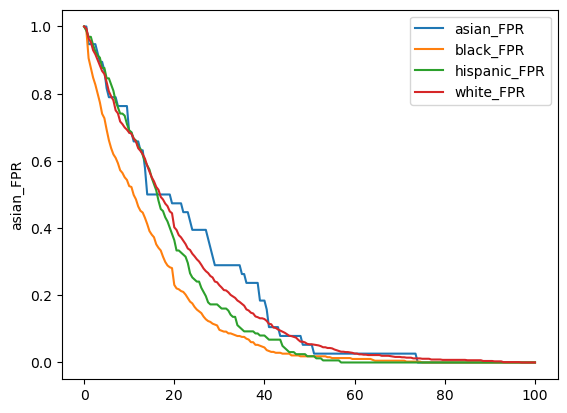

In [116]:
# for metric in ['asian_TPR', 'black_TPR', 'hispanic_TPR', 'white_TPR']:
#     ax = sns.lineplot(x=bins, y=np.abs(full_results[metric]), label=metric)
for metric in ['asian_FPR', 'black_FPR', 'hispanic_FPR', 'white_FPR']:
    ax = sns.lineplot(x=bins, y=np.abs(full_results[metric]), label=metric)

plt.show()

In [33]:
plot_result(full_results, metrics=['asian_TPR', 'black_TPR', 'hispanic_TPR', 'white_TPR'])

Expected multiple trials! Plotting for the single trial:


In [117]:
full_results = pd.DataFrame()
for group in group_map.keys():
    rows = repaired_unlabeled[repaired_unlabeled.group == group]
    evals = get_eval_group(rows['label'], rows['maxmin'], group)

    full_results = pd.concat([full_results, evals], axis=1)
full_results['thresholds'] = bins.copy()

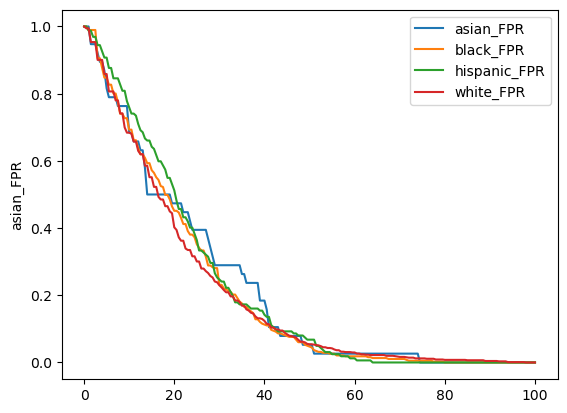

In [118]:
# for metric in ['asian_TPR', 'black_TPR', 'hispanic_TPR', 'white_TPR']:
#     ax = sns.lineplot(x=bins, y=np.abs(full_results[metric]), label=metric)
for metric in ['asian_FPR', 'black_FPR', 'hispanic_FPR', 'white_FPR']:
    ax = sns.lineplot(x=bins, y=np.abs(full_results[metric]), label=metric)

plt.show()

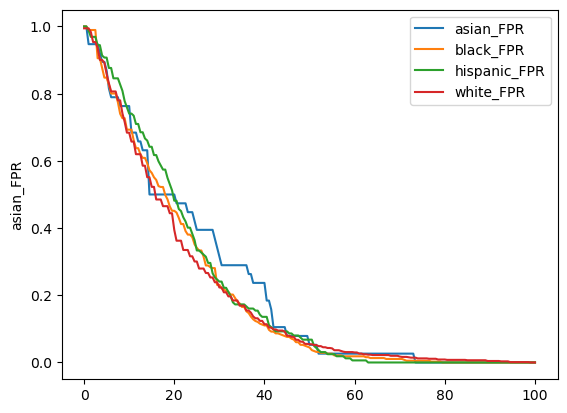

In [119]:
full_results = pd.DataFrame()
for group in group_map.keys():
    rows = repaired_unlabeled[repaired_unlabeled.group == group]
    evals = get_eval_group(rows['label'], rows['lexi'], group)

    full_results = pd.concat([full_results, evals], axis=1)
full_results['thresholds'] = bins.copy()

# for metric in ['asian_TPR', 'black_TPR', 'hispanic_TPR', 'white_TPR']:
#     ax = sns.lineplot(x=bins, y=np.abs(full_results[metric]), label=metric)
for metric in ['asian_FPR', 'black_FPR', 'hispanic_FPR', 'white_FPR']:
    ax = sns.lineplot(x=bins, y=np.abs(full_results[metric]), label=metric)

plt.show()

In [ ]:
 
# df["lexi"] = df.apply(lambda x: x[score_col] + x[shift_col]*lambdas_rec[-1][group_map[x[attr_col]]], axis=1)
# df["maxmin"] = df.apply(lambda x: x[score_col] + x[shift_col]*lambdas_rec[-1][group_map[x[attr_col]]], axis=1)
